In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import boston_housing, mnist,cifar10, imdb
(x_train,y_train),(x_test,y_test) = mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Ce dataset a été préparé par Google :

✔️ déjà séparé en train / test
✔️ déjà mélangé
✔️ déjà chargé en mémoire
✔️ déjà mis au bon format (X, y)

Donc la fonction load_data() retourne directement deux tuples :

(x_train, y_train)

(x_test, y_test)

In [2]:
print("Training set shape:", x_train.shape)
print("Test set shape:", x_test.shape)


Training set shape: (60000, 28, 28)
Test set shape: (10000, 28, 28)


In [3]:
print("Classes:", np.unique(y_train))
print("Number of classes:", len(np.unique(y_train)))

Classes: [0 1 2 3 4 5 6 7 8 9]
Number of classes: 10


In [4]:
print("Image shape:", x_train[0].shape)
print("Number of features:", x_train[0].size)


Image shape: (28, 28)
Number of features: 784


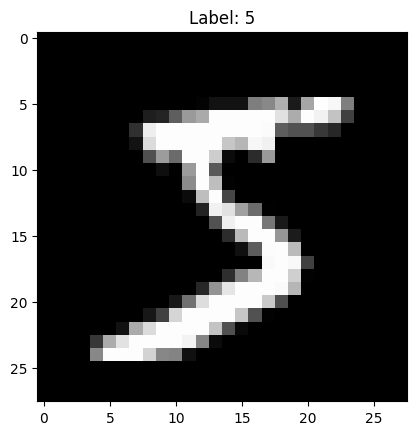

In [5]:
#show the first image
plt.imshow(x_train[0], cmap="gray")
plt.title(f"Label: {y_train[0]}")
plt.show()

In [6]:
import numpy as np

classes, counts = np.unique(y_train, return_counts=True)
for c, count in zip(classes, counts):
    print(f"Class {c}: {count} samples")


Class 0: 5923 samples
Class 1: 6742 samples
Class 2: 5958 samples
Class 3: 6131 samples
Class 4: 5842 samples
Class 5: 5421 samples
Class 6: 5918 samples
Class 7: 6265 samples
Class 8: 5851 samples
Class 9: 5949 samples


In [7]:
x_train_flat = x_train.reshape(60000, -1)  # 60000 x 784
x_test_flat  = x_test.reshape(10000, -1)    # 10000 x 784

print(x_train_flat.shape)
print(x_test_flat.shape)
# Flatten the images
x_train_flat = x_train.reshape(60000, -1)  # 60000 x 784
x_test_flat  = x_test.reshape(10000, -1)  # 10000 x 784

# Normalize pixel values to range [0,1]
x_train_norm = x_train_flat / 255.0
x_test_norm  = x_test_flat / 255.0
print(x_train_norm[0])




(60000, 784)
(10000, 784)
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.     

Pourquoi on aplatit pour les réseaux fully-connected (MLP) :

Un réseau fully-connected (dense) prend des vecteurs 1D en entrée.

Les images sont des matrices 2D (28×28 pour MNIST), donc il faut les transformer en vecteurs (flatten) pour que le réseau puisse les traiter.

Exemple : 28×28 = 784 pixels → vecteur de 784 valeurs.

Pourquoi flattening est en réalité une mauvaise idée pour la classification d’images :

Perte de la structure spatiale

Chaque pixel est traité indépendamment.

Les relations locales (voisinage de pixels, contours, formes) sont perdues.

Exemple : un “8” et un “0” peuvent avoir les mêmes pixels mais disposés différemment → le réseau ne voit pas la forme.

Moins efficace pour la reconnaissance de motifs

Les CNN exploitent les motifs locaux avec des filtres convolutifs.

Flatten empêche le réseau de détecter des motifs spatiaux.

Plus de paramètres

Pour une image 28×28 : un neurone d’entrée → 784 poids.

Pour 1000 neurones dans la couche suivante → 784×1000 = 784 000 poids juste pour la première couche.

Trop de paramètres → risque d’overfitting.

In [8]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
import numpy as np

# MNIST flatten et normalisation déjà fait
# x_train_norm, x_test_norm, y_train, y_test

# Split le training set pour avoir un sous-ensemble d'entraînement et de validation/test
x_train_split, x_val_split, y_train_split, y_val_split = train_test_split(
    x_train_norm, y_train, test_size=0.2, random_state=42
)

# Créer 10 réseaux avec random_state différents
scores = []

for i in range(10):
    model = SGDClassifier(loss="log_loss", max_iter=1000, random_state=i)
    model.fit(x_train_split, y_train_split)
    score = model.score(x_val_split, y_val_split)  # on teste sur le sous-ensemble de validation
    scores.append(score)
    print(f"Model {i+1} (random_state={i}) test accuracy: {score:.4f}")

# Moyenne et écart type
mean_score = np.mean(scores)
std_score = np.std(scores)
print(f"\nMean test accuracy: {mean_score:.4f}")
print(f"Standard deviation: {std_score:.4f}")


Model 1 (random_state=0) test accuracy: 0.9155
Model 2 (random_state=1) test accuracy: 0.9122
Model 3 (random_state=2) test accuracy: 0.9121
Model 4 (random_state=3) test accuracy: 0.9087
Model 5 (random_state=4) test accuracy: 0.9126
Model 6 (random_state=5) test accuracy: 0.9132
Model 7 (random_state=6) test accuracy: 0.9101
Model 8 (random_state=7) test accuracy: 0.9104
Model 9 (random_state=8) test accuracy: 0.9124
Model 10 (random_state=9) test accuracy: 0.9131

Mean test accuracy: 0.9120
Standard deviation: 0.0018


In [9]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist

num_features = x_train_flat.shape[1]  # 784
num_classes = 10

# Définir le modèle
model = Sequential()
model.add(InputLayer(input_shape=(num_features,)))

# Couches cachées
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))

# Couche de sortie
model.add(Dense(num_classes, activation='softmax'))

# Compiler le modèle
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Afficher le résumé du modèle
model.summary()

# Entraîner le modèle
model.fit(x_train_flat, y_train, epochs=10, batch_size=32, validation_split=0.2)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │           170 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 577,178 (2.20 MB)

 Trainable params: 577,178 (2.20 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.6979 - loss: 1.4242 - val_accuracy: 0.9420 - val_loss: 0.2419
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.9419 - loss: 0.2243 - val_accuracy: 0.9467 - val_loss: 0.2028
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.9573 - loss: 0.1613 - val_accuracy: 0.9616 - val_loss: 0.1582
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.9670 - loss: 0.1236 - val_accuracy: 0.9608 - val_loss: 0.1618
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.9727 - loss: 0.1060 - val_accuracy: 0.9632 - val_loss: 0.1611
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.9766 - loss: 0.0882 - val_accuracy: 0.9672 - val_loss: 0.1391
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.9810 - loss: 0.0721 - val_accuracy: 0.9693 - val_loss: 0.1217
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9817 -

ici on a créé le model

Why do we use the Softmax activation layer at the end?
Ce que fait Softmax

Softmax transforme ces nombres en probabilités qui s’additionnent à 1 :

Exemple avec les logits [2.5, 1.0, 0.1, 3.2] → après Softmax → [0.27, 0.08, 0.03, 0.62]

La somme = 1

Chaque valeur = probabilité que l’image soit cette classe

La plus grande probabilité = la classe prédite

3️⃣ Pourquoi on l’utilise à la fin ?

Les couches cachées (ReLU, etc.) servent à apprendre des caractéristiques de l’image.

On ne veut pas transformer ces valeurs intermédiaires en probabilités.

Softmax à la fin → seule la sortie finale devient des probabilités.

💡 Résumé ultra-simple :

Softmax = transforme les scores du réseau en probabilités pour chaque classe afin de savoir laquelle est la plus probable.

In [12]:
  # Fit the model
model.fit(
      x_train_norm,      # données d'entraînement
      y_train,           # labels d'entraînement
      epochs=10,         # nombre d'époques
      batch_size=60,     # taille du batch
      verbose=1          # afficher la progression
  )

  # Évaluer le modèle sur les données de test
  test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=0)
  print(f"Test accuracy: {test_accuracy:.4f}")
  #ici on entraine le model puis on le test


Epoch 1/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 17s 15ms/step - accuracy: 0.8478 - loss: 0.4797
Epoch 2/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 17s 12ms/step - accuracy: 0.9936 - loss: 0.0232
Epoch 3/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - accuracy: 0.9949 - loss: 0.0187
Epoch 4/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - accuracy: 0.9940 - loss: 0.0183
Epoch 5/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - accuracy: 0.9941 - loss: 0.0208
Epoch 6/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - accuracy: 0.9950 - loss: 0.0169
Epoch 7/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - accuracy: 0.9956 - loss: 0.0147
Epoch 8/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - accuracy: 0.9964 - loss: 0.0137
Epoch 9/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - accuracy: 0.9958 - loss: 0.0141
Epoch 10/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - accuracy: 0.9965 - loss: 0.0126
Test accuracy: 0.9779


ici j'ai entrainer puis tester le model

Epoch 1/10 → c’est la première passe sur tout le jeu de données d’entraînement.

accuracy: 0.8585 → le réseau a bien classé 85,85 % des images de l’entraînement.

loss: 0.4777 → c’est une mesure de l’erreur : plus c’est petit, mieux le modèle prédit.

Ensuite, à chaque epoch, le réseau ajuste ses poids pour mieux reconnaître les chiffres.

On voit que l’accuracy augmente rapidement, jusqu’à 99,67 % à la dernière epoch.

La loss diminue, ce qui veut dire que les prédictions sont de plus en plus proches des vraies valeurs.

Interprétation globale :

Ton réseau apprend très bien, il devient capable de reconnaître presque toutes les images du training set.

Une accuracy proche de 1 et une loss très faible sont de bons signes.

💡 À retenir : plus l’accuracy

In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │           170 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,731,536 (6.61 MB)

 Trainable params: 577,178 (2.20 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,154,358 (4.40 MB)

layer=couche
Layer (type)

Indique le nom et le type de chaque couche (Dense ici).

Montre que tu sais que chaque couche est entièrement connectée à la précédente.

2️⃣ Output Shape

Le nombre de neurones dans la couche, ou la forme de la sortie de cette couche.

Exemple : (None, 512) → “None” correspond au nombre d’exemples dans un batch (variable), et 512 est le nombre de neurones.

3️⃣ Param # (Paramètres)

Nombre total de poids et biais que cette couche va apprendre.

Formule : Parame

tres=(input_size×neurons)+neurons(pour les biais)
Exemple : première couche → 784 entrées × 512 neurones + 512 biais = 401,920

4️⃣ Total params / Trainable params / Non-trainable params

Total params : somme de tous les paramètres du réseau.

Trainable params : tous les paramètres qui peuvent être ajustés pendant l’entraînement.

Non-trainable params : paramètres qui ne changent pas (ici, souvent 0)

In [14]:
# Sauvegarder le modèle complet (architecture + poids + configuration)
model.save("my_mnist_model.h5")


In [15]:
#PARTIE 3
# QUESTION 13 12 11
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation
from tensorflow.keras.utils import to_categorical

# Charger MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reshape pour avoir une dimension canal (1 canal car images grayscale)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test  = x_test.reshape(-1, 28, 28, 1)

# Normalisation
x_train = x_train / 255.0
x_test  = x_test / 255.0

# One-hot encode des labels
y_train = to_categorical(y_train, 10)
y_test  = to_categorical(y_test, 10)
model = Sequential()

# Première convolution
model.add(Conv2D(32, kernel_size=(5,5), strides=(1,1), padding='same', input_shape=(28,28,1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))

# Deuxième convolution
model.add(Conv2D(64, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))

# Flatten + Dense layers
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))

# Compilation
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=128, epochs=5, validation_data=(x_test, y_test))
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")
model.summary()



/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 86s 179ms/step - accuracy: 0.8685 - loss: 0.4444 - val_accuracy: 0.9826 - val_loss: 0.0550
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 137s 168ms/step - accuracy: 0.9832 - loss: 0.0545 - val_accuracy: 0.9865 - val_loss: 0.0401
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 82s 168ms/step - accuracy: 0.9881 - loss: 0.0370 - val_accuracy: 0.9884 - val_loss: 0.0354
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 81s 166ms/step - accuracy: 0.9913 - loss: 0.0279 - val_accuracy: 0.9900 - val_loss: 0.0297
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 84s 170ms/step - accuracy: 0.9930 - loss: 0.0217 - val_accuracy: 0.9906 - val_loss: 0.0294
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.9872 - loss: 0.0410
Test accuracy: 0.9906


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │       401,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │         1,290 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,266,464 (4.83 MB)

 Trainable params: 422,154 (1.61 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 844,310 (3.22 MB)

Total params: 1 266 464

Trainable params: 422 154

Non-trainable params: 0

Optimizer params: 844 310

On va vérifier et expliquer ces valeurs.

Calcul couche par couche

Rappel architecture et formes intermédiaires (input = 28×28×1) :

Conv2D(32, kernel 5×5, padding='same', in_channels=1)

form output : 28 × 28 × 32

paramètres par filtre = kernel_h × kernel_w × in_channels = 5 × 5 × 1 = 25

+1 bias par filtre → 25 + 1 = 26

total paramètres = 26 × 32 = 832

MaxPool2D(2×2) → réduit spatial : 28→14, donc sortie 14 × 14 × 32 (pas de paramètres).

Conv2D(64, kernel 3×3, padding='same', in_channels=32)

form output : 14 × 14 × 64

paramètres par filtre = 3 × 3 × 32 = 9 × 32 = 288

+1 bias → 288 + 1 = 289

total paramètres = 289 × 64 = 18 496

MaxPool2D(2×2) → réduit spatial : 14→7, sortie 7 × 7 × 64 (pas de paramètres).

Flatten → vecteur de taille 7 × 7 × 64 = 3 136 unités.

Dense(128)

connexions poids = n_in × n_out = 3 136 × 128 = 401 408

biais = n_out = 128

total = 401 408 + 128 = 401 536

Dense(10) (sortie)

poids = 128 × 10 = 1 280

biais = 10

total = 1 280 + 10 = 1 290

Somme des paramètres entraînables

Additionnons toutes les couches qui ont des paramètres :

Conv1 : 832

Conv2 : 18 496

Dense(128) : 401 536

Dense(10) : 1 290

Faisons l’addition pas à pas :

832 + 18 496 = 19 328

19 328 + 401 536 = 420 864

420 864 + 1 290 = 422 154

→ Trainable params = 422 154 (correspond exactement à ton affichage).

D’où vient le Total params = 1 266 464 ?

Le total affiché par mon run inclut les paramètres de l’optimiseur (ici Adam).
Adam garde généralement deux vecteurs d’état par paramètre :

la moyenne des gradients (m)

la moyenne des carrés des gradients (v)

Donc en pratique l’optimiseur stocke ≈ 2 × (trainable params) valeurs supplémentaires.

Calcul :

2 × 422 154 = 844 308



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


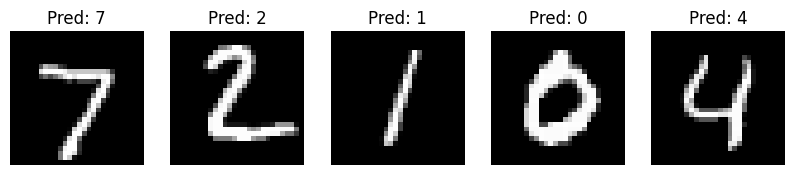

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Prédictions sur le test set
preds = model.predict(x_test[:5])
pred_classes = np.argmax(preds, axis=1)

# Affichage des 5 premières images et de leur prédiction
plt.figure(figsize=(10, 4))

for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {pred_classes[i]}")
    plt.axis('off')

plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


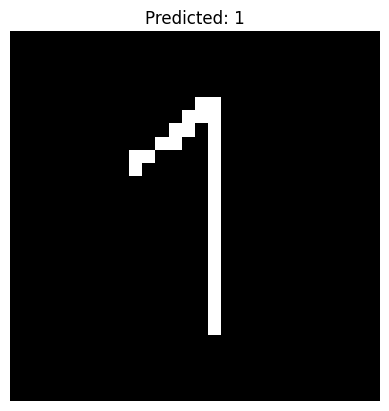

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


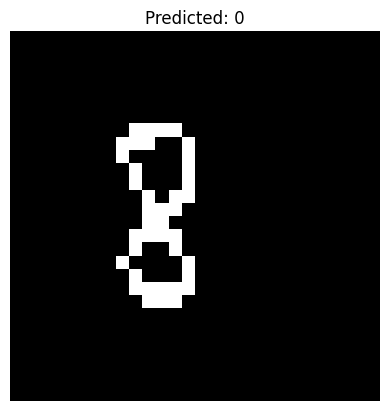

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


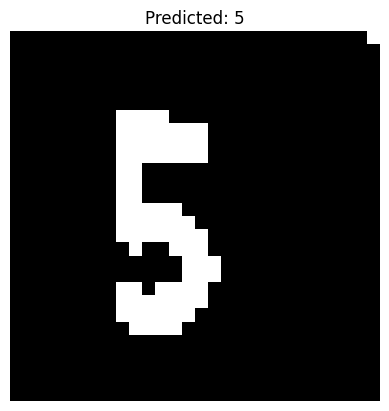

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


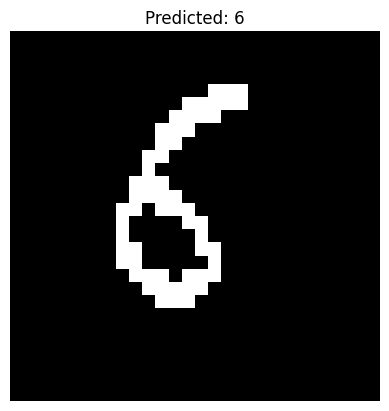

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Fonction pour charger + préparer une image
def prepare_image(path):
    
    img = load_img(path, color_mode="grayscale", target_size=(28, 28))

  
    img = img_to_array(img)

 

    # Normalisation
    img = img / 255.0

    # Ajouter dimension batch : (1, 28, 28, 1)
    img = np.expand_dims(img, axis=0)
    return img

# Chemins des images
images = ["image1.png", "image2.png", "image3_5.png", "image4_6.png"]

for path in images:
    img = prepare_image(path)
    prediction = model.predict(img)
    predicted_class = np.argmax(prediction)

    # Affichage
    plt.imshow(img[0].reshape(28,28), cmap="gray")
    plt.title(f"Predicted: {predicted_class}")
    plt.axis("off")
    plt.show()
